# **INSTALLING LIBRARIES AND LOADING DATA**



In [3]:
print(">>> Installing dependencies...")
!pip install opendatasets --quiet
!pip install pandas matplotlib seaborn --quiet

import opendatasets as od
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random


>>> Installing dependencies...


In [4]:



print("\n>>> Downloading the 'Animals-10' dataset from Kaggle...")
# Link to the dataset
dataset_url = 'https://www.kaggle.com/datasets/alessiocorrado99/animals10'
od.download(dataset_url)

# Creating a convenient folder structure
DATA_DIR = 'data/animals'
RAW_DATA_FOLDER = 'animals10/raw-img' # The folder name after download

if os.path.exists('data'):
    shutil.rmtree('data') # Deleting the old data folder if it exists

# Renaming and moving the folder for convenience
os.makedirs('data', exist_ok=True)
shutil.move(RAW_DATA_FOLDER, DATA_DIR)
shutil.rmtree('animals10') # Deleting the extra folder

print(f"\n>>> Data successfully downloaded and placed in the '{DATA_DIR}' folder.")
print(">>> Checking the contents of the data folder:")
!ls -l {DATA_DIR} | head -n 11


>>> Downloading the 'Animals-10' dataset from Kaggle...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Mary2309
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


100%|██████████| 586M/586M [00:07<00:00, 80.8MB/s]




>>> Data successfully downloaded and placed in the 'data/animals' folder.
>>> Checking the contents of the data folder:
total 1692
drwxr-xr-x 2 root root 307200 Oct  5 19:43 cane
drwxr-xr-x 2 root root 172032 Oct  5 19:43 cavallo
drwxr-xr-x 2 root root 114688 Oct  5 19:43 elefante
drwxr-xr-x 2 root root 155648 Oct  5 19:43 farfalla
drwxr-xr-x 2 root root 180224 Oct  5 19:43 gallina
drwxr-xr-x 2 root root  77824 Oct  5 19:43 gatto
drwxr-xr-x 2 root root 126976 Oct  5 19:43 mucca
drwxr-xr-x 2 root root 139264 Oct  5 19:43 pecora
drwxr-xr-x 2 root root 335872 Oct  5 19:43 ragno
drwxr-xr-x 2 root root 122880 Oct  5 19:43 scoiattolo


# **DATA ANALYSIS**

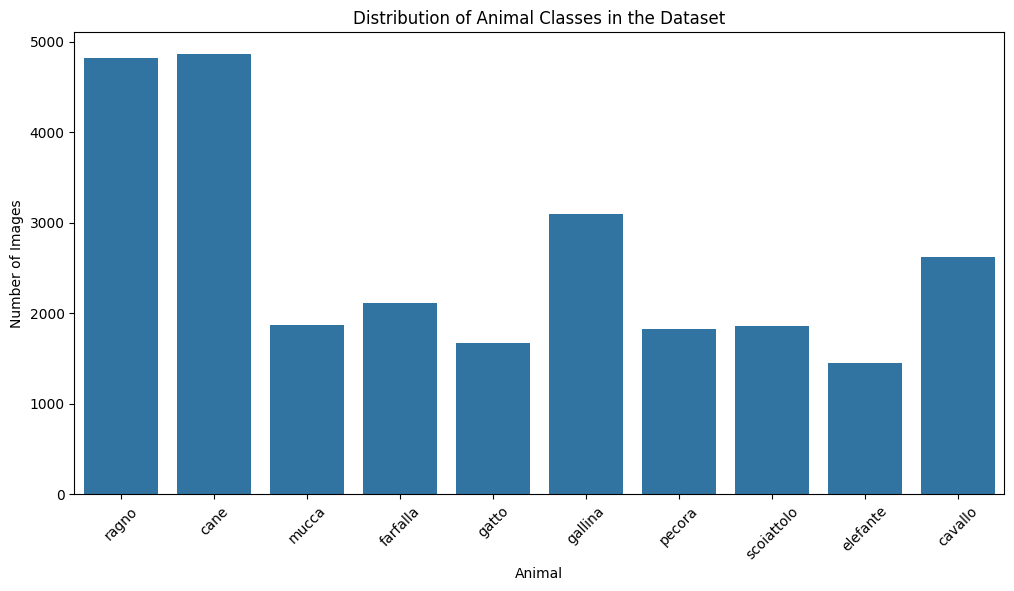

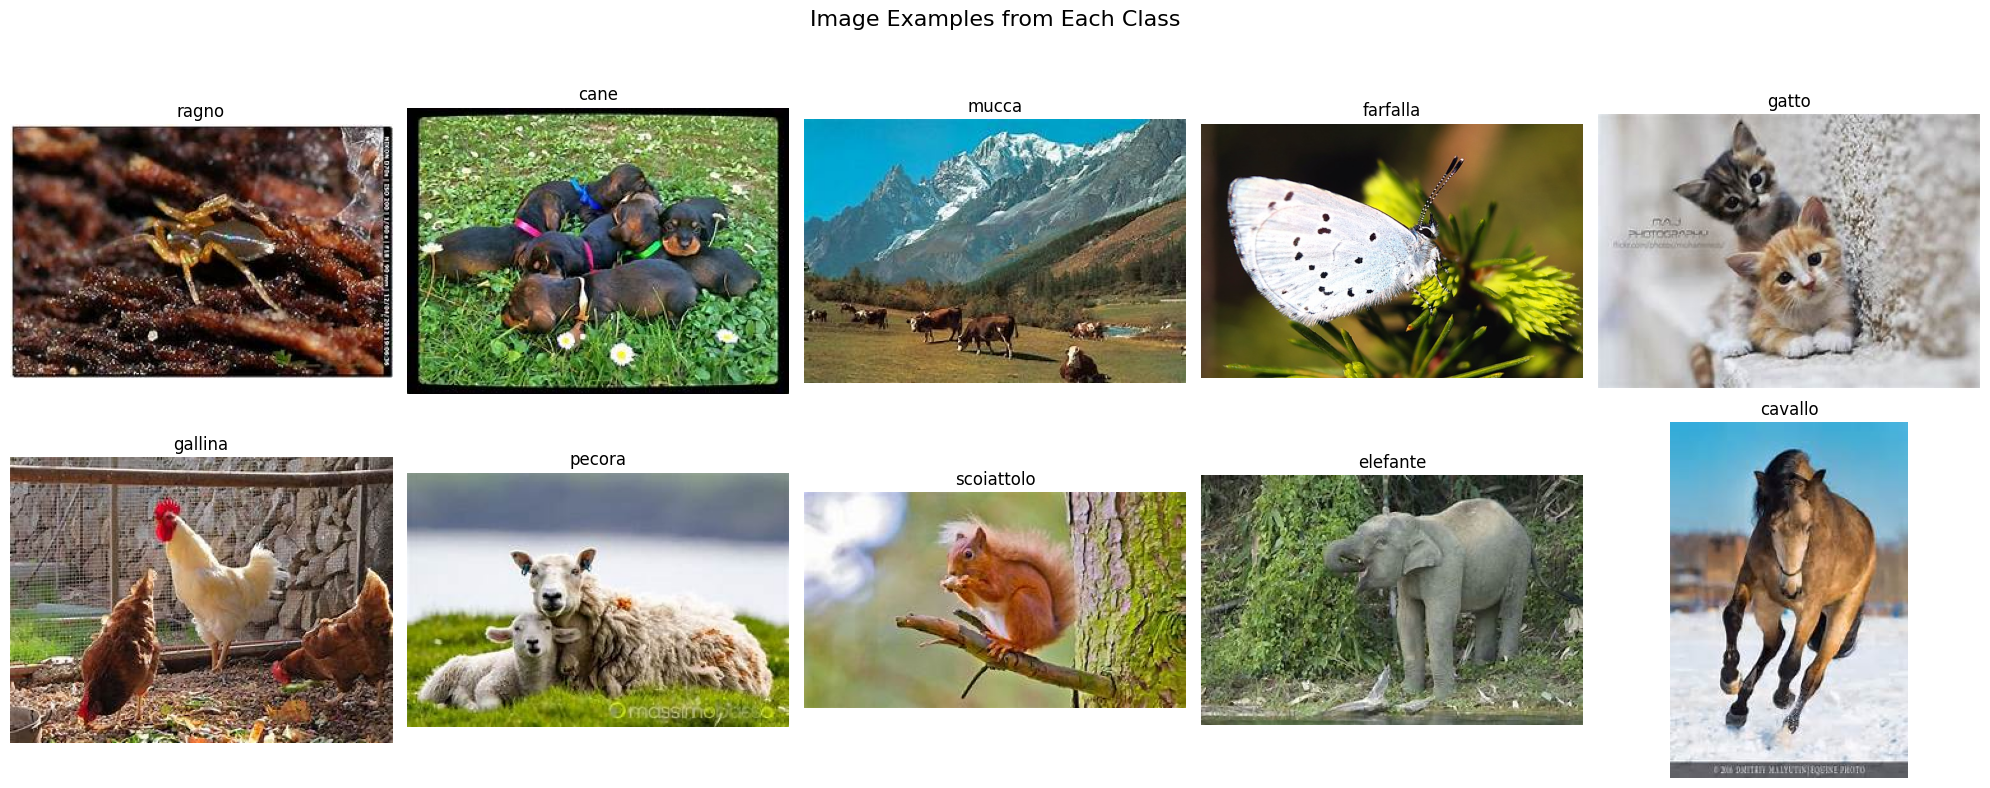

In [5]:
DATA_DIR_EDA = 'data/animals'

# 1. Analyze the distribution of classes
class_names_eda = [d for d in os.listdir(DATA_DIR_EDA) if os.path.isdir(os.path.join(DATA_DIR_EDA, d))]
class_counts_eda = {name: len(os.listdir(os.path.join(DATA_DIR_EDA, name))) for name in class_names_eda}

# Create a DataFrame for plotting
df_counts = pd.DataFrame(list(class_counts_eda.items()), columns=['Animal', 'Count'])

# Plot the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Animal', y='Count', data=df_counts)
plt.title('Distribution of Animal Classes in the Dataset')
plt.xlabel('Animal')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# 2. Visualize image examples from each class
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Image Examples from Each Class', fontsize=16)
axes = axes.flatten()

for i, class_name in enumerate(class_names_eda):
    class_dir = os.path.join(DATA_DIR_EDA, class_name)
    # Choose a random image from the class directory
    img_name = random.choice(os.listdir(class_dir))
    img = Image.open(os.path.join(class_dir, img_name))

    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# **TRAINING AND TESTING THE NER MODEL**

In [8]:
!python train_ner.py --output_dir ner_model --iterations 30

!python inference_ner.py --text "There is a beautiful dog in this picture." --model_path ner_model

/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "This is definitely a butterfly" with entities "[(20, 29, 'ANIMAL')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "A beautiful horse is in the frame" with entities "[(10, 15, 'ANIMAL')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Look, it's a cat!" with entities "[(14, 17, 'ANIMAL')]". Use `spacy.training.offsets_to_

# **CLASSIFICATION MODEL TRAINING AND TESTING**

In [9]:
print("Starting image classification model training...")
!python train_classification.py --data_dir data/animals --num_epochs 5 --model_save_path animal_classifier.pth

# Select a random image for testing
import random
test_image_class = random.choice(os.listdir('data/animals'))
test_image_name = random.choice(os.listdir(f'data/animals/{test_image_class}'))
test_image_path = f'data/animals/{test_image_class}/{test_image_name}'

print(f"Testing classification model on image: {test_image_path}")
!python inference_classification.py --image_path "{test_image_path}" --model_path "animal_classifier.pth"


Starting image classification model training...
Using device: cuda:0
Found classes (10): ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 251MB/s]

Epoch 1/5
Loss: 0.3371

Epoch 2/5
Loss: 0.1793

Epoch 3/5
Loss: 0.1682

Epoch 4/5
Loss: 0.1578

Epoch 5/5
Loss: 0.1508

Model saved to 'animal_classifier.pth'
Testing classification model on image: data/animals/mucca/OIP-HFA6eTnvxkZ0XshXSA02LwHaFI.jpeg
Predicted animal: mucca


# **START OF THE FINAL CONVEYOR**




>>> STARTING DEMONSTRATION...

>>> DEMONSTRATION 1 (EXPECTED RESULT: True)

Test image: data/animals/gatto/kari-shea-471277-unsplash.jpg


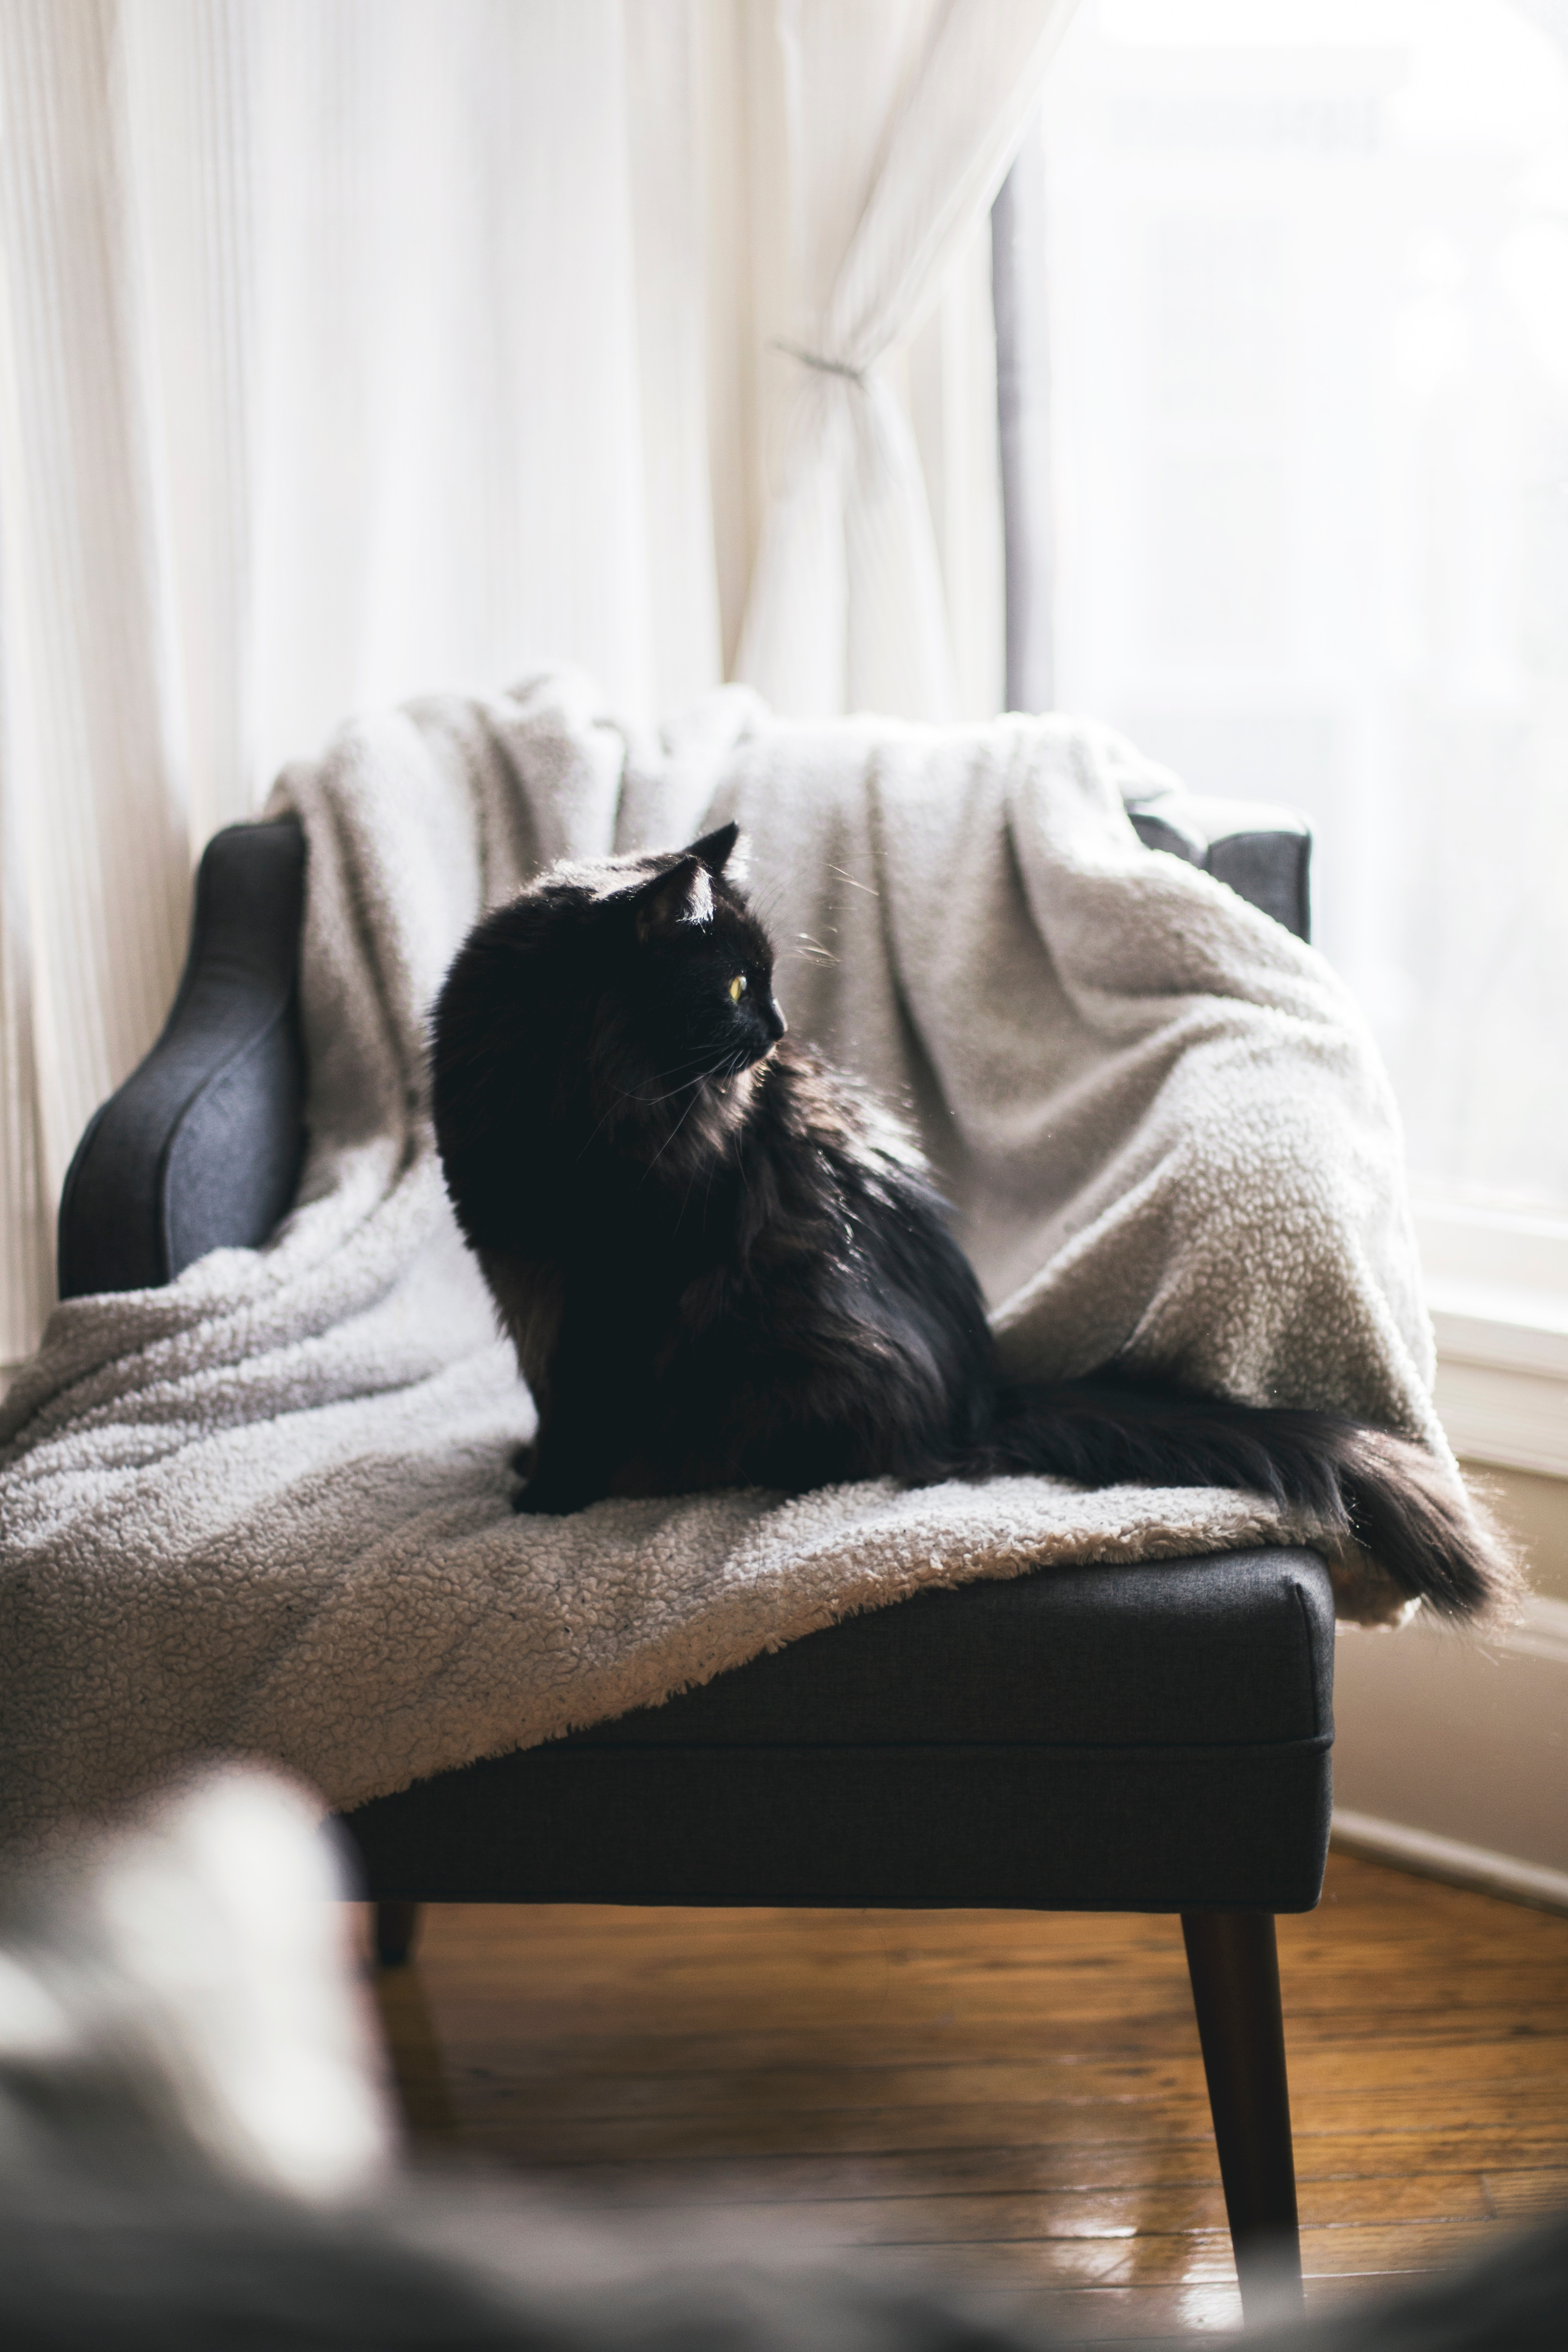

Input text: 'The photo shows a cat'
Input image: 'data/animals/gatto/kari-shea-471277-unsplash.jpg'
Search and translation result: 'cat' -> 'gatto'
Classification result: Image contains 'gatto'

FINAL RESULT: True


>>> DEMONSTRATION 2 (EXPECTED RESULT: False)

Test image: data/animals/gatto/kari-shea-471277-unsplash.jpg


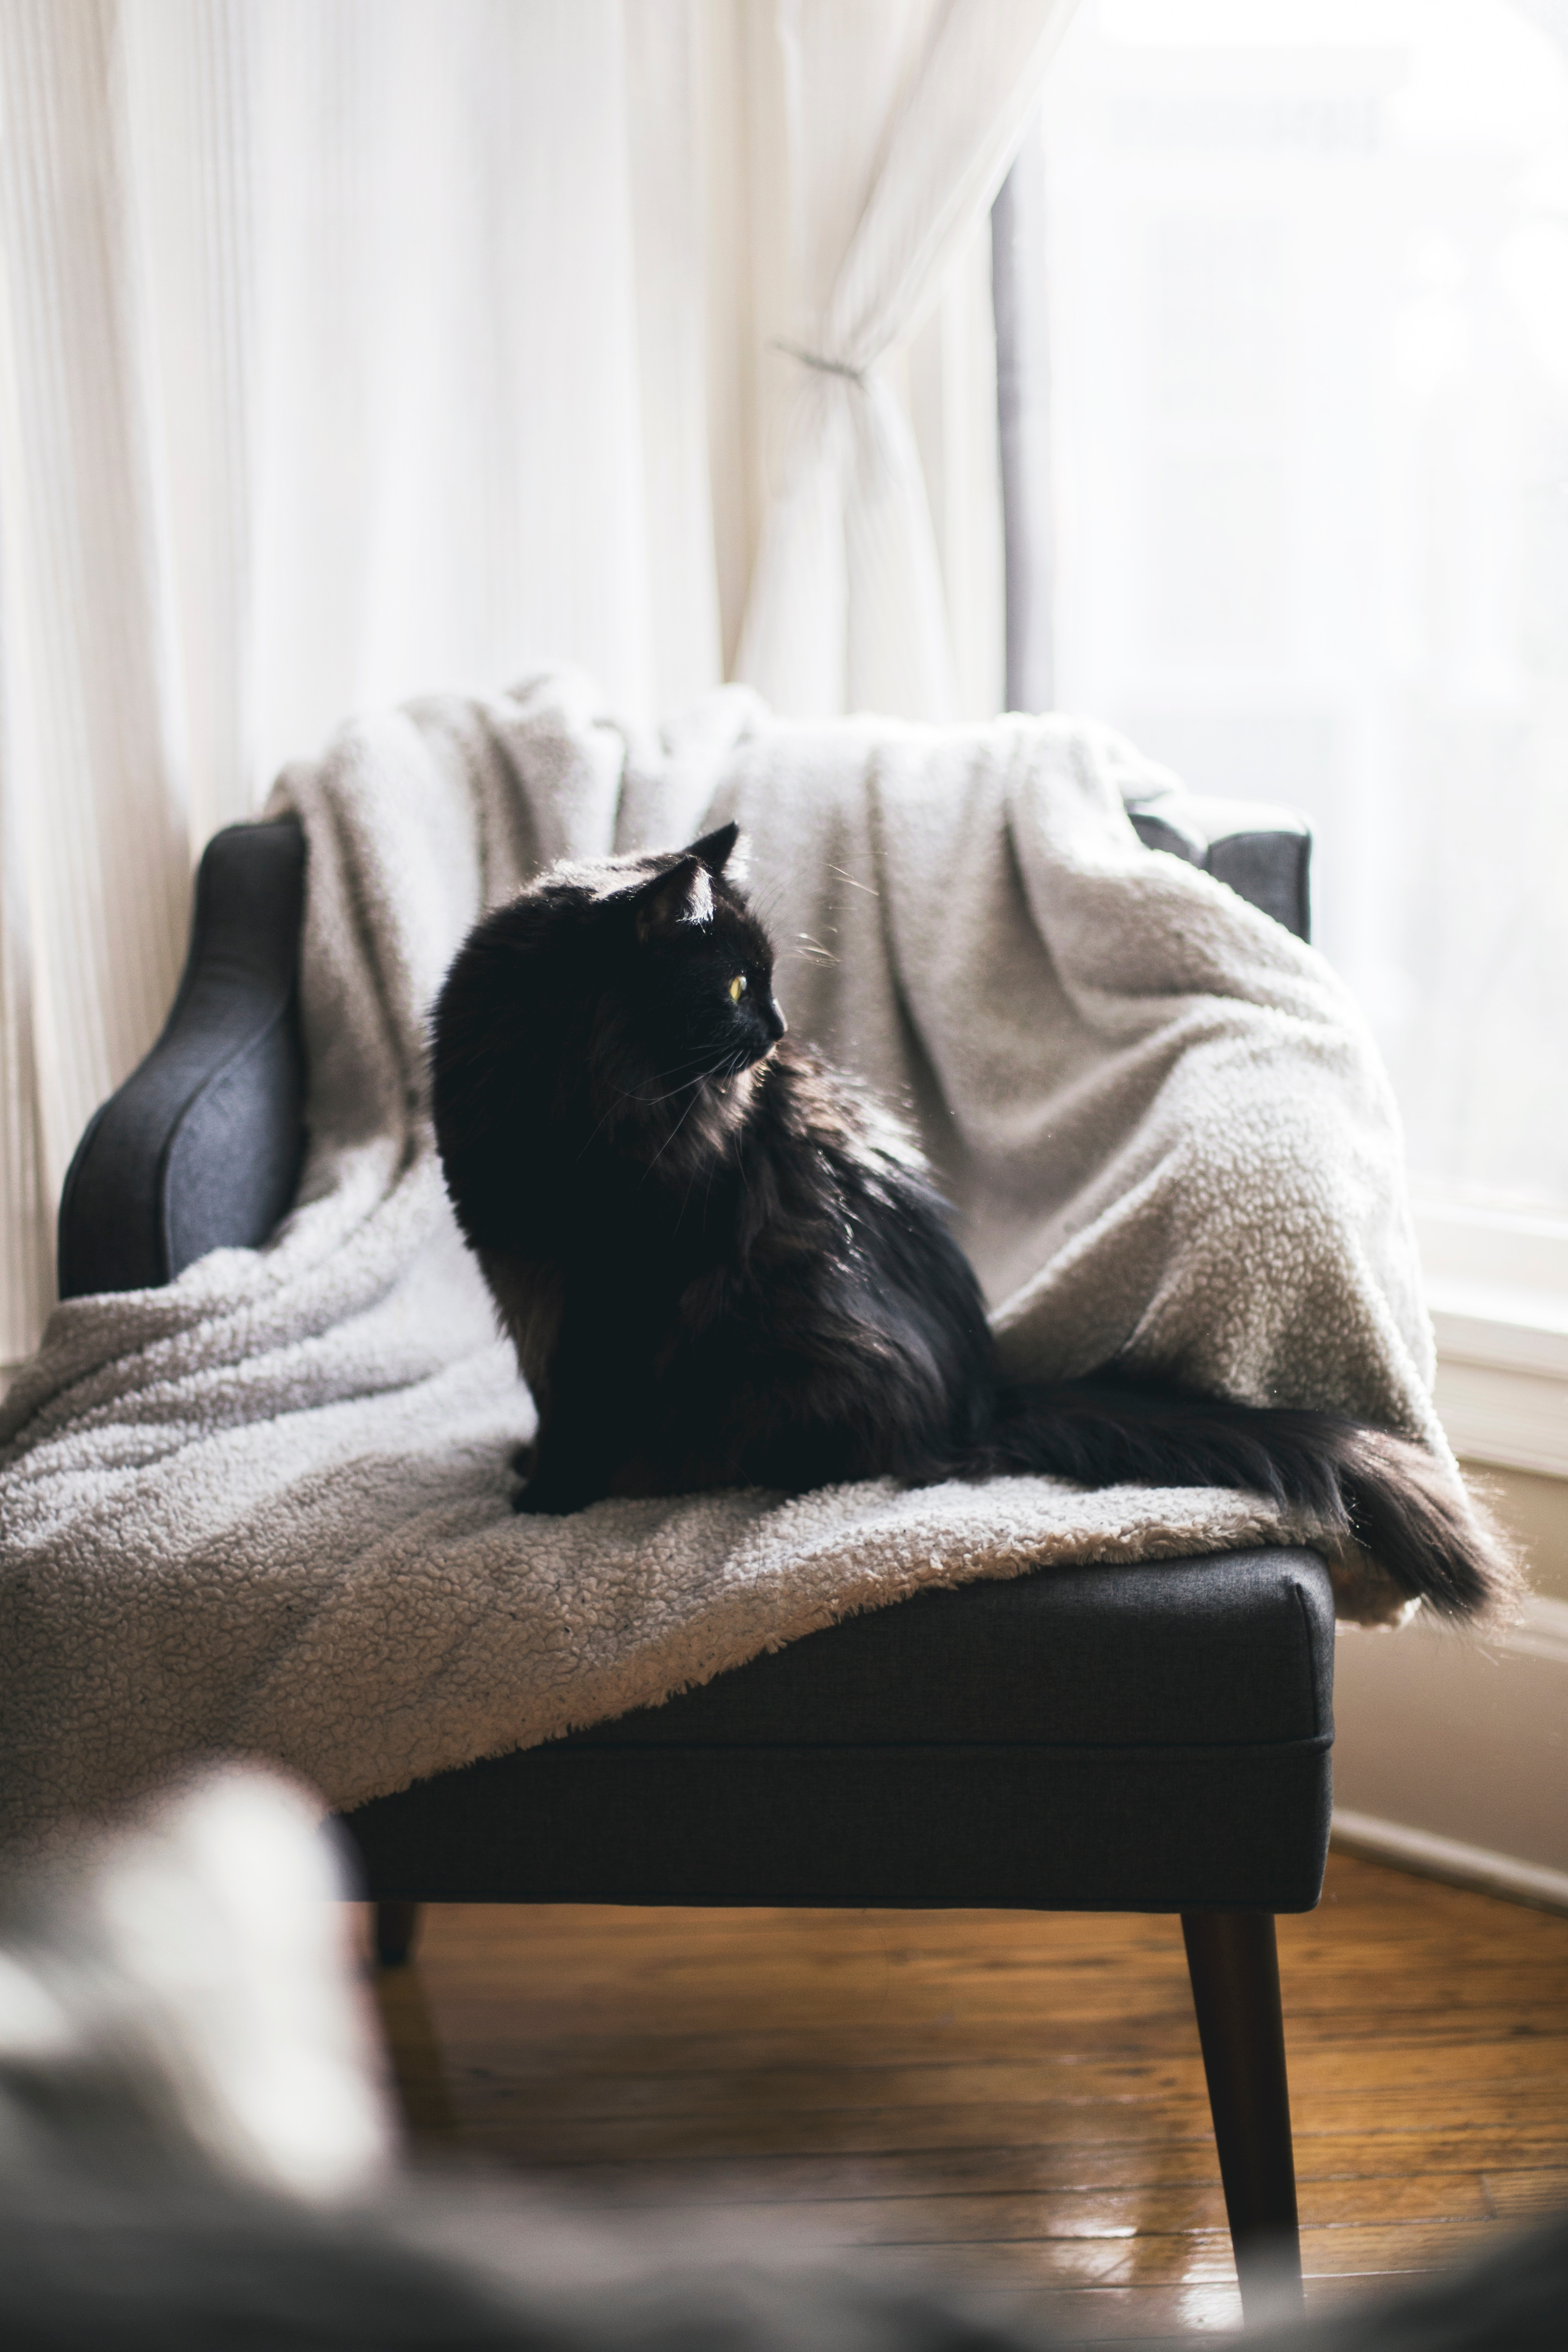

Input text: 'This is an image of a horse'
Input image: 'data/animals/gatto/kari-shea-471277-unsplash.jpg'
Search and translation result: 'horse' -> 'cavallo'
Classification result: Image contains 'gatto'

FINAL RESULT: False


In [14]:
print("\n>>> STARTING DEMONSTRATION...")

from IPython.display import display, Image as IPImage
import os, random

# Example 1: Correct
print("\n>>> DEMONSTRATION 1 (EXPECTED RESULT: True)\n")
try:
    image_path_1 = os.path.join('data/animals/gatto', random.choice(os.listdir('data/animals/gatto')))
    text_1 = "The photo shows a cat"
    print(f"Test image: {image_path_1}")
    display(IPImage(filename=image_path_1, width=200))
    !python pipeline.py --text "{text_1}" --image "{image_path_1}"

except Exception as e:
    print(f"Error: {e}")

# Example 2: Incorrect
print("\n\n>>> DEMONSTRATION 2 (EXPECTED RESULT: False)\n")
text_2 = "This is an image of a horse"
print(f"Test image: {image_path_1}")
display(IPImage(filename=image_path_1, width=200))
!python pipeline.py --text "{text_2}" --image "{image_path_1}"
